<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Mohammad Mehdi Zare
### Student Number : 98100431
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics  as metrics
from sklearn.ensemble import AdaBoostClassifier

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [3]:
df = pd.read_csv("heart_disease.csv")
# df.describe()
y = df["target"].copy()
x = df.drop("target", axis=1)

y=2*y-1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


### Adaboost Algorithm Implementation (40 points)

In [4]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
#     miss = [int(x) for x in (y_pred != y)]
#     miss2 = [x if x==1 else -1 for x in miss]
#     err_m = np.dot(w,miss) / sum(w)
#     return err_m
    return(sum(w * (np.not_equal(y, y_pred)).astype(int)))/sum(w)

    #TODO : Calculate the weighted error of a weak classifier.
    

def calculate_alpha(error):
    
    return .5*np.log( (1-error) / error)
    #TODO : Calculate the weight of a weak classifier.
    

def update_weights(w, alpha, y, y_pred):
#     miss = [int(x) for x in (y_pred != y)]
#     miss2 = [x if x==1 else -1 for x in miss]
#     w=np.multiply(w, np.exp([float(x) * alpha for x in miss2]))
#     return w
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        N=len(y)
        y_pred=0
        w = np.ones(N)
        for m in range(0, M):
            # Set weights
            if m == 0:
                w=w/N 
            else:
                w=update_weights(w, alpha, y, y_pred);
                
                
            clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
            clf_tree.fit(X,y,sample_weight=w)
            self.G_M.append(clf_tree)  
            y_pred= clf_tree.predict(X)
        # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
        #TODO
            error=calculate_error(y, y_pred, w)
            self.training_errors.append(error)
        # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
        #TODO
            alpha=calculate_alpha(error)
            self.alphas.append(alpha)
        # 3. Calculate alpha of this weak classifier and save it to list of alphas.
        #TODO


    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [5]:
#TODO : Fit model
ada=AdaBoost()
ada.fit(x_train, y_train,M = 400)

#TODO : Predict on test data

y_pred = ada.predict(x_test)
#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print('The Accurcy of the model is:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('The Precission of the model is:', round(metrics.precision_score(y_test, y_pred), 4))
print('The Recall of the model is:', round(metrics.recall_score(y_test, y_pred), 4))
print('The f-score of the model is:', round(metrics.f1_score(y_test, y_pred), 4))




The Accurcy of the model is: 0.8831
The Precission of the model is: 0.8693
The Recall of the model is: 0.8926
The f-score of the model is: 0.8808


In [6]:
ada_sk = AdaBoostClassifier(n_estimators = 400) # Same boosting rounds (M) as in our model
ada_sk.fit(x_train, y_train)
y_pred_sk = ada_sk.predict(x_test)
print('The Accurcy of the model is:', round(metrics.accuracy_score(y_test, y_pred_sk), 4))
print('The Precission of the model is:', round(metrics.precision_score(y_test, y_pred_sk), 4))
print('The Recall of the model is:', round(metrics.recall_score(y_test, y_pred_sk), 4))
print('The f-score of the model is:', round(metrics.f1_score(y_test, y_pred_sk), 4))





#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics

The Accurcy of the model is: 0.9318
The Precission of the model is: 0.9507
The Recall of the model is: 0.906
The f-score of the model is: 0.9278


### Early Stopping (15 points)

In [7]:
from sklearn.metrics import mean_squared_error
result={}
for count_of_estimators in range(1, 400):
    
    adai = ada_sk = AdaBoostClassifier(n_estimators =count_of_estimators )
    adai.fit(x_train, y_train)
    y_pred = adai.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    result[count_of_estimators]=val_error



#TODO : Calculate validation error for different number of estimators 

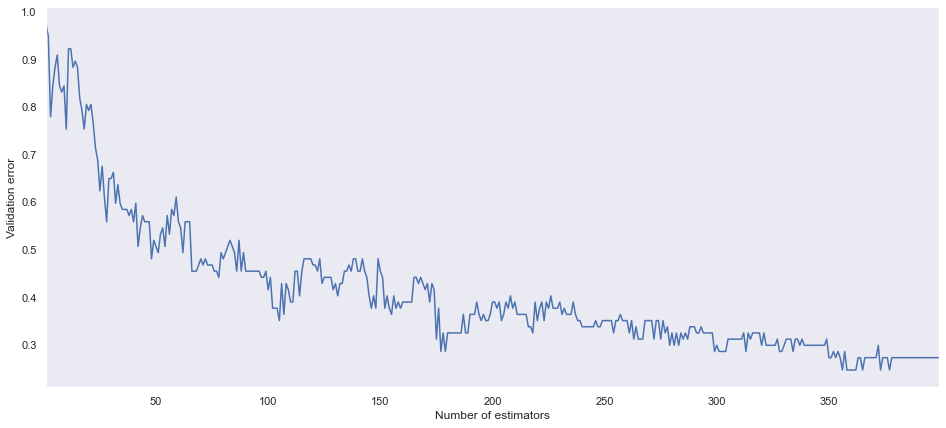

In [8]:
#TODO : Plot validation error versus number of estimators figure.
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()


In [9]:
print("The best number for estimators is: "+ str(list(result.values()).index(min(list(result.values())))+1))
print("The minimum value for validation error is: "+ str(min(list(result.values()))))

#TODO : Print the best number for estimators and minimum value for validation error.

The best number for estimators is: 356
The minimum value for validation error is: 0.24675324675324675


### Weighted Error (10 points)

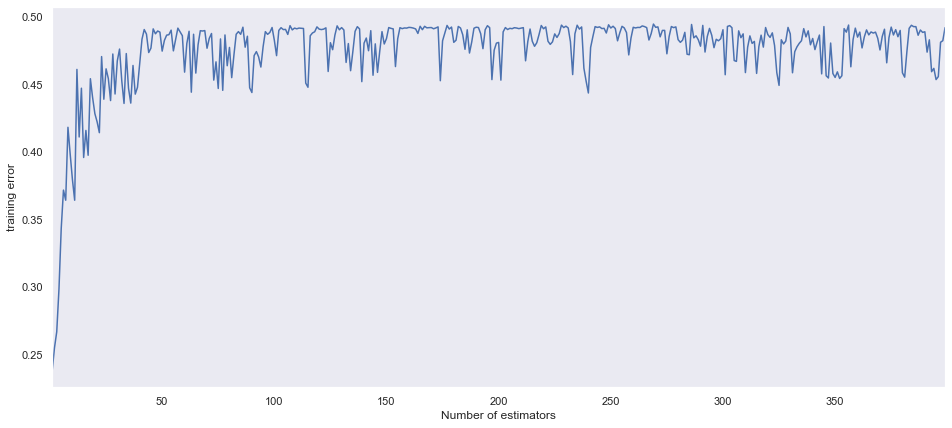

In [10]:
plt.figure(figsize=(16, 7))
sns.set(style='dark',)
ax = sns.lineplot(x=list(range(1,401)), y= ada.training_errors)
plt.xlabel("Number of estimators")
plt.ylabel("training error")
ax.set_xlim([1, max(list(result.keys()))])
plt.show()
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In [11]:

# AdaBoost needs internally a weak classifier to work. Usually it is something like a threshold on a single feature. If we use a strong classifier (big number of estimators) then you end-up with an overfitted model.
